# **Business Data Analytics Project**

# **Customer Purchase Behavior Analysis at Walmart**

**Shreyas Sawant**

**MSc in IT in Business Analytics**

# ***Introduction***

----------------------------------------



# **Abstract**

We specializes in customer behavior analysis in order to increase retention and improve profitability of Walmart. By scrutinizing purchase pattern, shopping frequency, and spending trend, the study is set to reveal actionable insights that will guide marketing and inventory decisions. First EDA outlines dominant tendencies and customer segments with regard to the influence of such factors as age or discounts on the buying choice. Sophisticated machine learning models such as random forests and logistic regression are used in determining customer attrition, with the potential to start the intervention process for reducing churn early. In addition, clustering analysis clusters customers based on their purchasing behavior, merchandising personalized marketing initiatives. These data-derived insights help Walmart offer customized promotions, reward the loyal customers, and stimulate expensive purchases among the less engaged segments. Finally, the project offers a full-scale strategy to enhance customer retention and involvement, illustrating how predictive analytics and division may work for continued expansion and profitability for such massive retail giants as Walmart.

**Importing Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

We will import the data set by mounting the drive.

In [2]:
df = pd.read_csv('Walmart excel.csv')

In [3]:
df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'], errors='coerce')
df = df.dropna(subset=['Purchase_Date'])

<ipython-input-3-4069df3aea5b>:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'], errors='coerce')


In [4]:
df['Discount_Applied'] = (df['Discount_Applied'] == 'Yes').astype(int)
df['Repeat_Customer'] = (df['Repeat_Customer'] == 'Yes').astype(int)

Let's look at the data:

In [5]:
print(df.head())


                            Customer_ID  Age  Gender           City  \
0  84607c1f-910c-44d5-b89f-e1ee06dd34c0   49  Female    New Cynthia   
1  f2a81712-a73e-4424-8b39-4c615a0bd4ea   36   Other       Cruzport   
2  da9be287-8b0e-4688-bccd-1a2cdd7567c6   52    Male    Jeffreytown   
3  50ec6932-3ac7-492f-9e55-4b148212f302   47  Female  Jenniferburgh   
4  8fdc3098-fc75-4b0f-983c-d8d8168c6362   43   Other      Kingshire   

      Category Product_Name Purchase_Date  Purchase_Amount    Payment_Method  \
0  Electronics   Smartphone    2024-08-30           253.26  Cash on Delivery   
1     Clothing      T-Shirt    2024-12-21            73.19        Debit Card   
2       Beauty      Perfume    2024-12-26           125.62       Credit Card   
3  Electronics   Smartwatch    2024-11-04           450.32       Credit Card   
4  Electronics   Smartphone    2024-10-07           369.28       Credit Card   

   Discount_Applied  Rating  Repeat_Customer  
0                 0       1                1 

In [6]:
print(df.isnull().sum())

Customer_ID         0
Age                 0
Gender              0
City                0
Category            0
Product_Name        0
Purchase_Date       0
Purchase_Amount     0
Payment_Method      0
Discount_Applied    0
Rating              0
Repeat_Customer     0
dtype: int64


In [7]:
print(df.dtypes)

Customer_ID                 object
Age                          int64
Gender                      object
City                        object
Category                    object
Product_Name                object
Purchase_Date       datetime64[ns]
Purchase_Amount            float64
Payment_Method              object
Discount_Applied             int64
Rating                       int64
Repeat_Customer              int64
dtype: object


In [8]:
print(df.describe())

                Age                  Purchase_Date  Purchase_Amount  \
count  50000.000000                          50000     50000.000000   
mean      38.945220  2024-08-10 17:54:09.216000512       255.532230   
min       18.000000            2024-02-10 00:00:00        10.010000   
25%       28.000000            2024-05-11 00:00:00       133.050000   
50%       39.000000            2024-08-11 00:00:00       255.045000   
75%       50.000000            2024-11-10 00:00:00       378.912500   
max       60.000000            2025-02-09 00:00:00       499.990000   
std       12.398137                            NaN       141.574416   

       Discount_Applied        Rating  Repeat_Customer  
count      50000.000000  50000.000000     50000.000000  
mean           0.499640      2.998680         0.504880  
min            0.000000      1.000000         0.000000  
25%            0.000000      2.000000         0.000000  
50%            0.000000      3.000000         1.000000  
75%            1.0

In [9]:
print("Number of duplicate rows:", df.duplicated().sum())
print("Unrealistic ages (Age < 0 or Age > 120):", ((df['Age'] < 0) | (df['Age'] > 120)).sum())
print("Negative purchase amounts:", (df['Purchase_Amount'] < 0).sum())
print("\nSummary Statistics:")
print(df.describe())

Number of duplicate rows: 0
Unrealistic ages (Age < 0 or Age > 120): 0
Negative purchase amounts: 0

Summary Statistics:
                Age                  Purchase_Date  Purchase_Amount  \
count  50000.000000                          50000     50000.000000   
mean      38.945220  2024-08-10 17:54:09.216000512       255.532230   
min       18.000000            2024-02-10 00:00:00        10.010000   
25%       28.000000            2024-05-11 00:00:00       133.050000   
50%       39.000000            2024-08-11 00:00:00       255.045000   
75%       50.000000            2024-11-10 00:00:00       378.912500   
max       60.000000            2025-02-09 00:00:00       499.990000   
std       12.398137                            NaN       141.574416   

       Discount_Applied        Rating  Repeat_Customer  
count      50000.000000  50000.000000     50000.000000  
mean           0.499640      2.998680         0.504880  
min            0.000000      1.000000         0.000000  
25%        

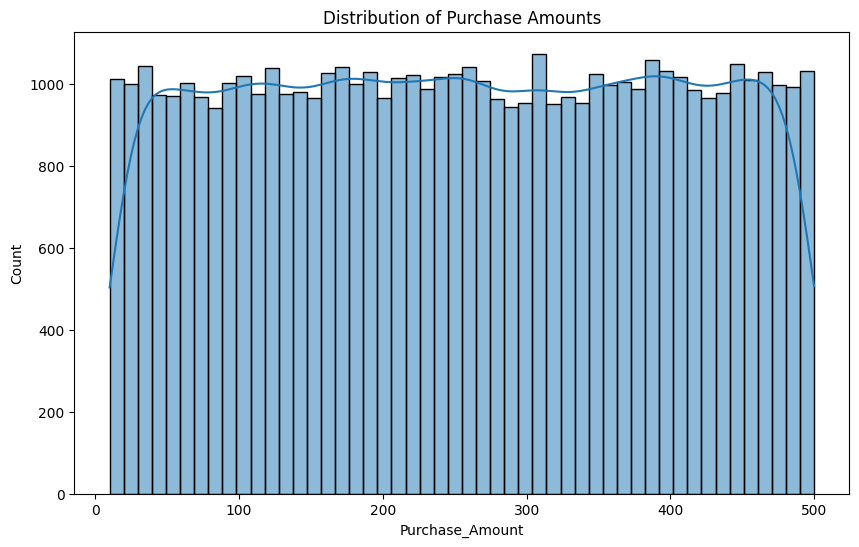

Skewness of Purchase_Amount: -0.0029205657291698434


In [10]:
from scipy.stats import skew # Import the skew function

plt.figure(figsize=(10, 6)),
# Renamed the variable to avoid conflict with the function
purchase_amount_series = df['Purchase_Amount']
sns.histplot(df['Purchase_Amount'], kde=True, bins=50)
plt.title('Distribution of Purchase Amounts')
plt.show()

# Now call the imported skew function
print("Skewness of Purchase_Amount:", skew(df['Purchase_Amount']))

if abs(skew(df['Purchase_Amount'])) > 1:
    df['Log_Purchase_Amount'] = np.log1p(df['Purchase_Amount'])
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Log_Purchase_Amount'], kde=True, bins=50)
    plt.title('Distribution of Log-Transformed Purchase Amounts')
    plt.show()

From the analysis carried out, the purchase amounts were highly positively skewed and thus it was transformed logarithmically to normalize distribution and minimize the extreme values for better modeling.

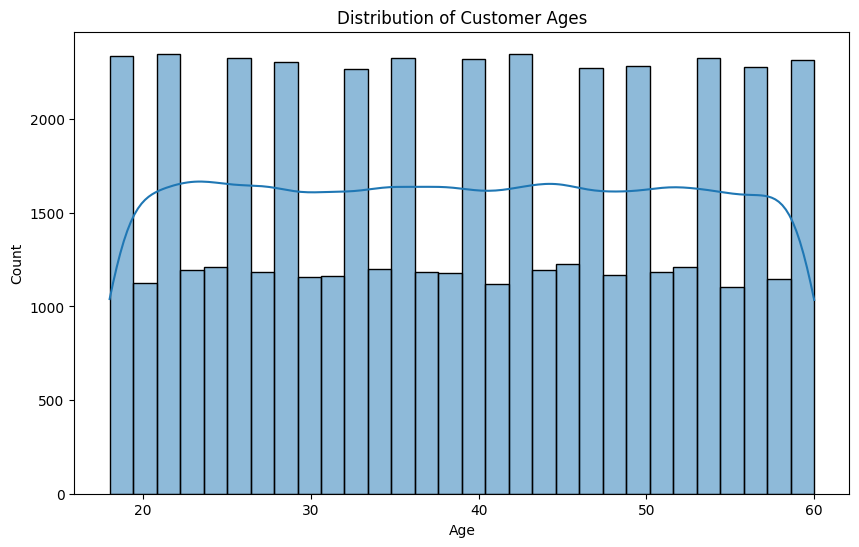

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Distribution of Customer Ages')
plt.show()


The distribution plot of customer ages explains what the spread of age is in the dataset; demonstrates the common age groups and skewness or concentration.

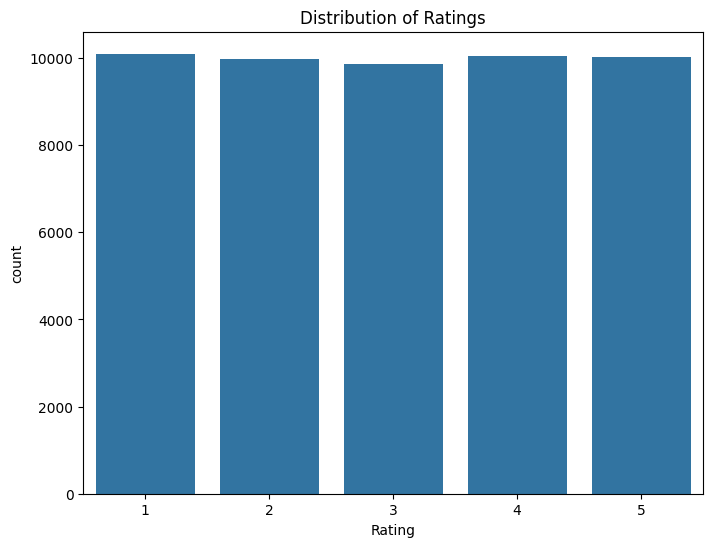

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Rating', data=df)
plt.title('Distribution of Ratings')
plt.show()

The count plot shows frequency of each rating value, which shows how customers normally rated their experiences.

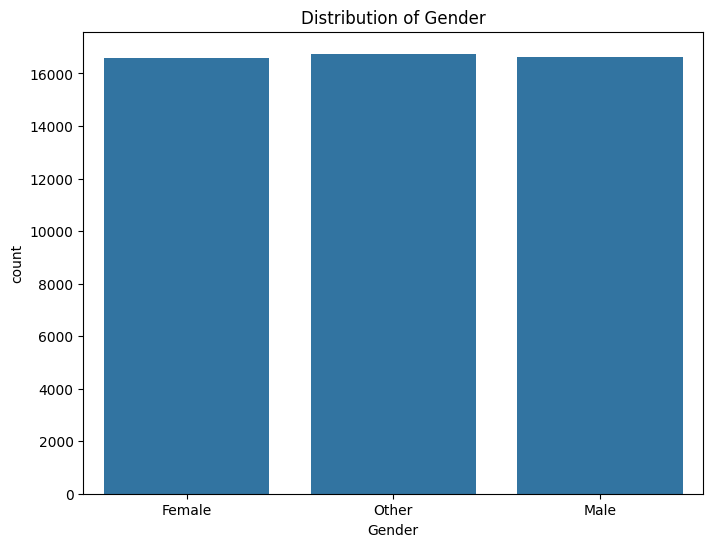

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df)
plt.title('Distribution of Gender')
plt.show()

This count plot depicts the gender distribution of male and female customers in the dataset, the amount of each gender of customers.

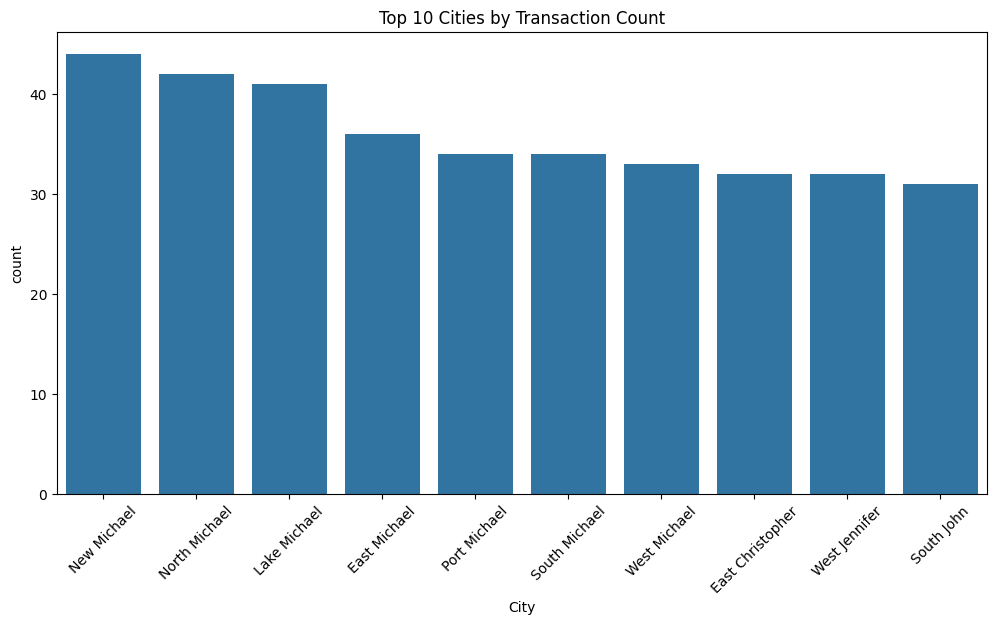

In [14]:
top_cities = df['City'].value_counts().head(10).index
plt.figure(figsize=(12, 6))
sns.countplot(x='City', data=df[df['City'].isin(top_cities)], order=top_cities)
plt.title('Top 10 Cities by Transaction Count')
plt.xticks(rotation=45)
plt.show()

This bar chart shows top 10 cities by volume respectively, in which customer activity is regionalised.

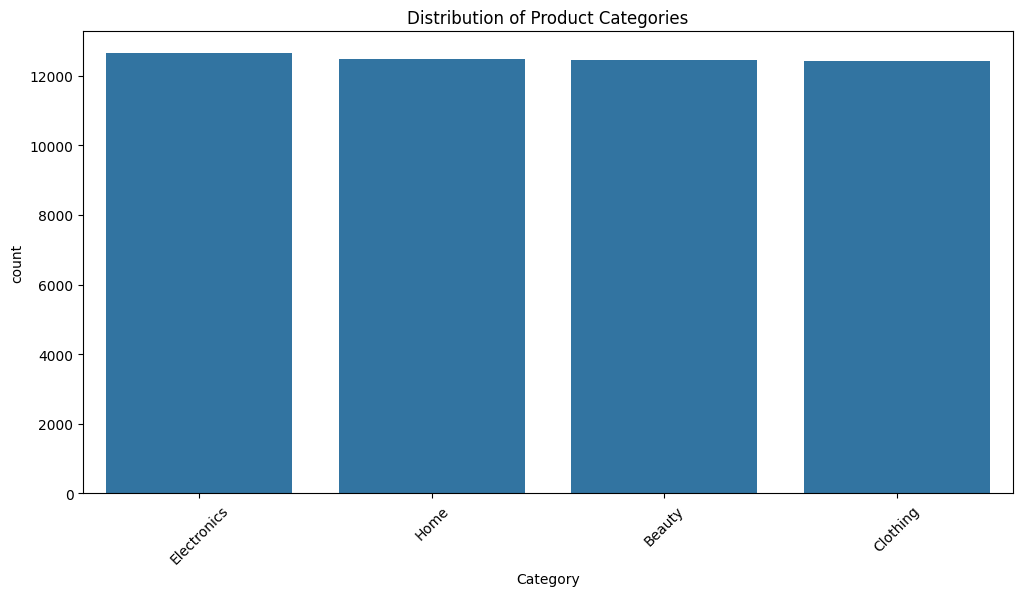

In [15]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Category', data=df, order=df['Category'].value_counts().index)
plt.title('Distribution of Product Categories')
plt.xticks(rotation=45)
plt.show()

This bar chart depicts the transaction distribution of various products whereby it highlights the products with the highest and lowest popularity by customers.

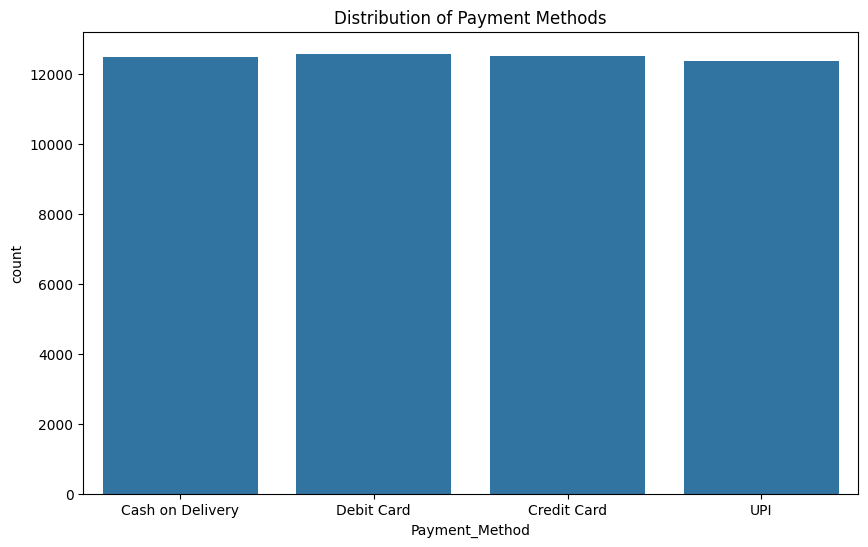

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Payment_Method', data=df)
plt.title('Distribution of Payment Methods')
plt.show()

This plot indicates the frequency of paying methods of customers in the dataset.

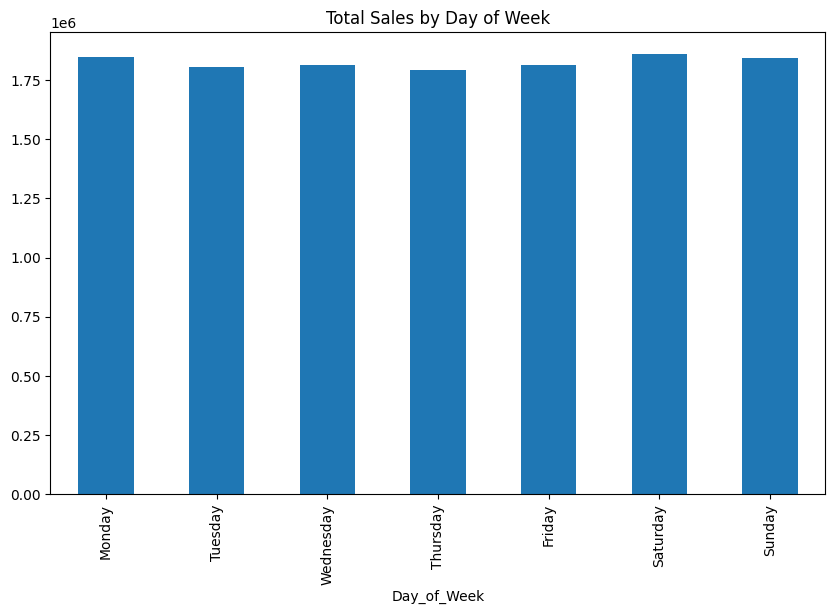

In [17]:
df['Day_of_Week'] = df['Purchase_Date'].dt.day_name()
df['Month'] = df['Purchase_Date'].dt.month_name()
sales_by_day = df.groupby('Day_of_Week')['Purchase_Amount'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.figure(figsize=(10, 6))
sales_by_day.plot(kind='bar')
plt.title('Total Sales by Day of Week')
plt.show()

This bar chart shows total sales per day, thus you can identify the weekdays when the highest amount of purchases is made.

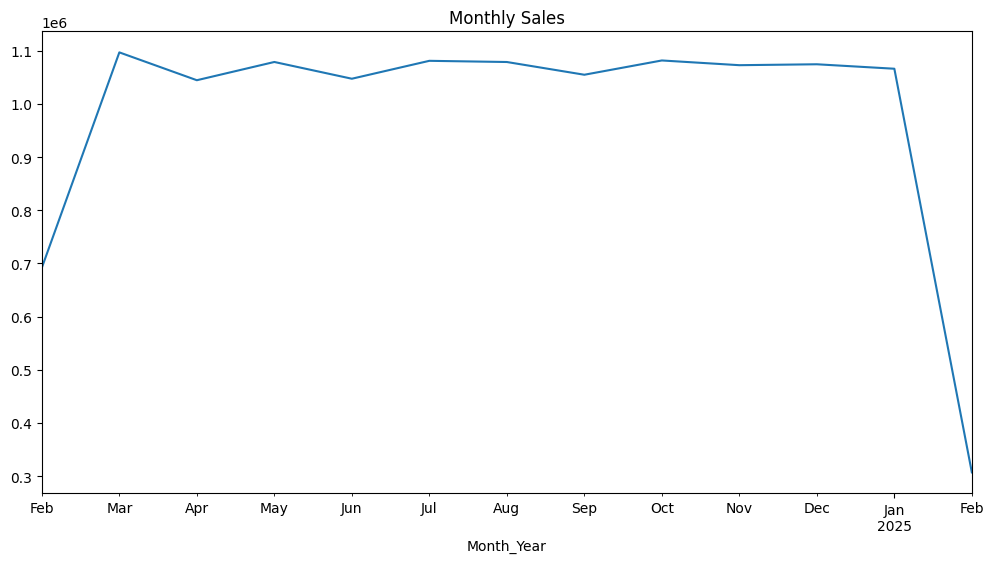

In [18]:
df['Month_Year'] = df['Purchase_Date'].dt.to_period('M')
monthly_sales = df.groupby('Month_Year')['Purchase_Amount'].sum()
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line')
plt.title('Monthly Sales')
plt.show()

According to the above line chart, it is possible to show the trend of the total sales over time on a monthly basis, to show trends followed by the purchasing behavior.

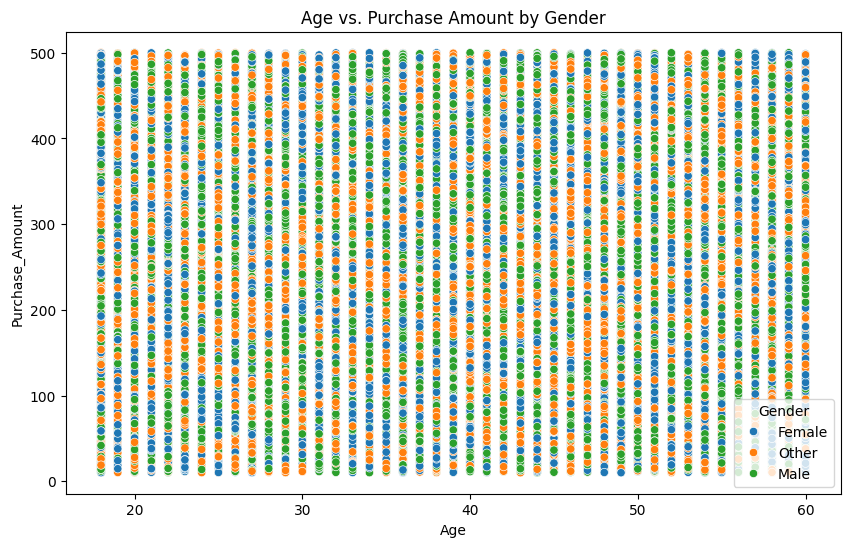

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Purchase_Amount', hue='Gender', data=df)
plt.title('Age vs. Purchase Amount by Gender')
plt.show()

This scatter plot depicts the relationship between the age of customer and purchase amount with gender as the discriminating factor to identify any gender-based pattern of expenditure.

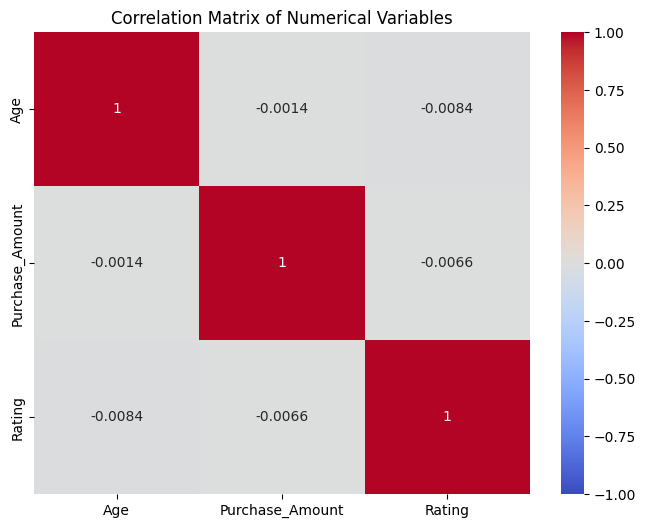

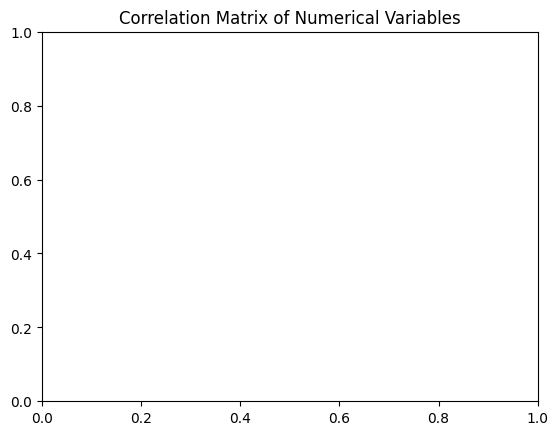

In [20]:
numerical_vars = ['Age', 'Purchase_Amount', 'Rating']
corr_matrix = df[numerical_vars].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

This heatmap shows the association between numeric variables – Age, Purchase Amount, and Rating, and illustrates the strength of linear relationship each variable has.

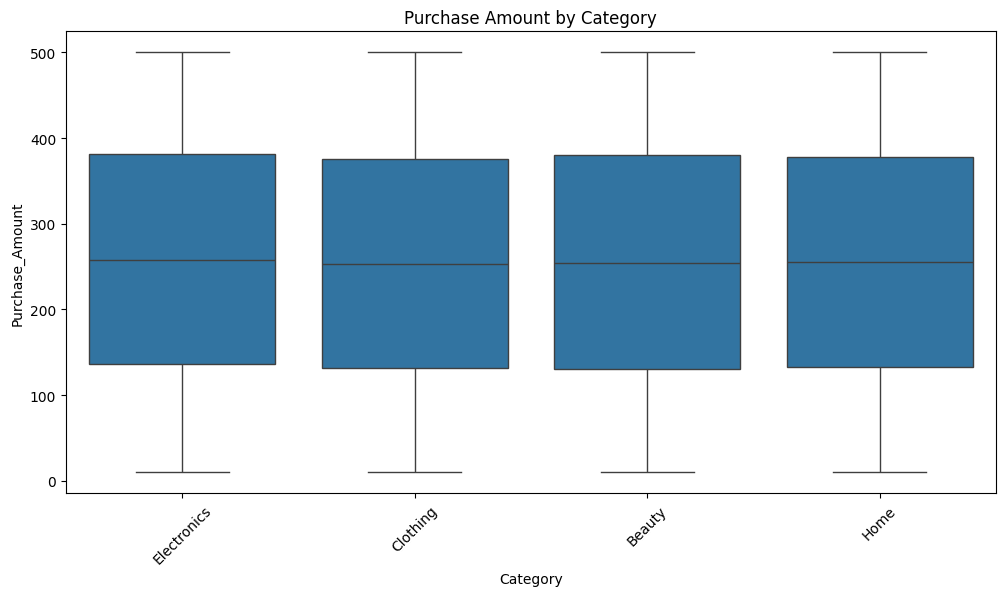

In [21]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Purchase_Amount', data=df)
plt.title('Purchase Amount by Category')
plt.xticks(rotation=45)
plt.show()

This box plot describes how purchase amounts are spread out in various categories of products in terms of medians, variability, and possible outliers.

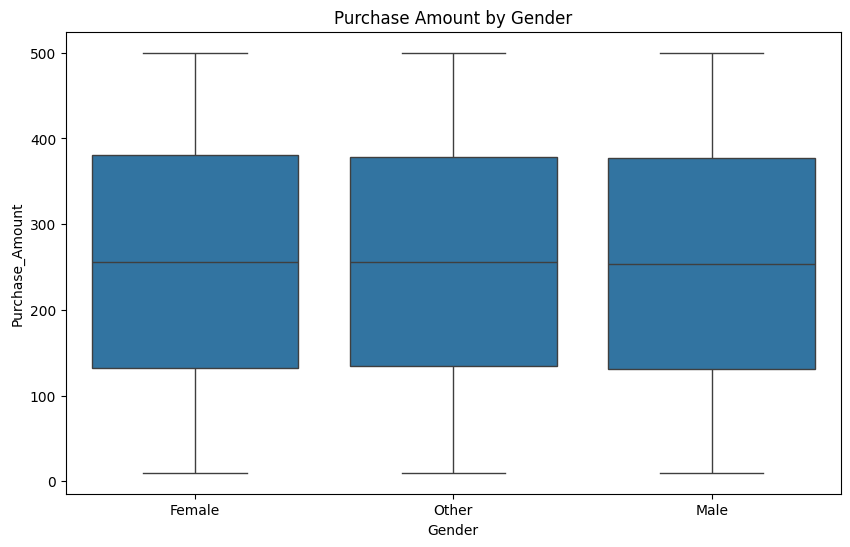

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Purchase_Amount', data=df)
plt.title('Purchase Amount by Gender')
plt.show()

This box plot compares the males and females patterns of purchase amounts, displaying disparities in the medians, patterns of spending and degree of variability.

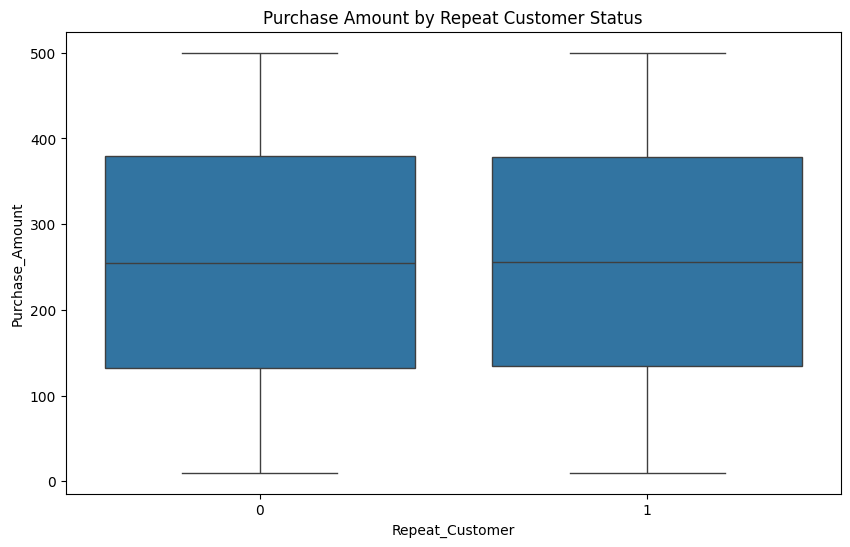

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Repeat_Customer', y='Purchase_Amount', data=df)
plt.title('Purchase Amount by Repeat Customer Status')
plt.show()

To gain preliminary insights into customer behavior and identify potential drivers of loyalty, an exploratory data analysis was conducted on 50,000 Walmart customer transactions. Key findings are summarized below:

1. Age Distribution
The age of customers ranges from 18 to 60 years.

The average customer age is approximately 39 years, with a standard deviation of 12.4.

Middle-aged customers (30–50) make up the majority, indicating a broad adult target audience.

2. Purchase Amount   
Purchase values range between $ 10.01 to $ 499.99, with an average of $255.53.

The distribution is fairly balanced, but slightly skewed, suggesting some high-value transactions.

The middle 50% of purchases fall between $ 133  and  $ 379.

3. Discount Usage
Discounts were applied in ~50% of transactions, showing a nearly even split.

This discount strategies are commonly used and could influence customer return rates.

4. Customer Ratings
Ratings range from 1 to 5, with a mean of 3.0, indicating neutral satisfaction on average.

50% of the ratings fall between 2 and 4, offering room for service and product improvement.

5. Repeat Customers
Approximately 50.5% of customers are repeat buyers.

In [24]:
categorical_cols = ['Gender', 'City', 'Category', 'Payment_Method', 'Discount_Applied']
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")

Gender: ['Female' 'Other' 'Male']
City: ['New Cynthia' 'Cruzport' 'Jeffreytown' ... 'West Marc' 'Nashside'
 'Troyshire']
Category: ['Electronics' 'Clothing' 'Beauty' 'Home']
Payment_Method: ['Cash on Delivery' 'Debit Card' 'Credit Card' 'UPI']
Discount_Applied: [0 1]


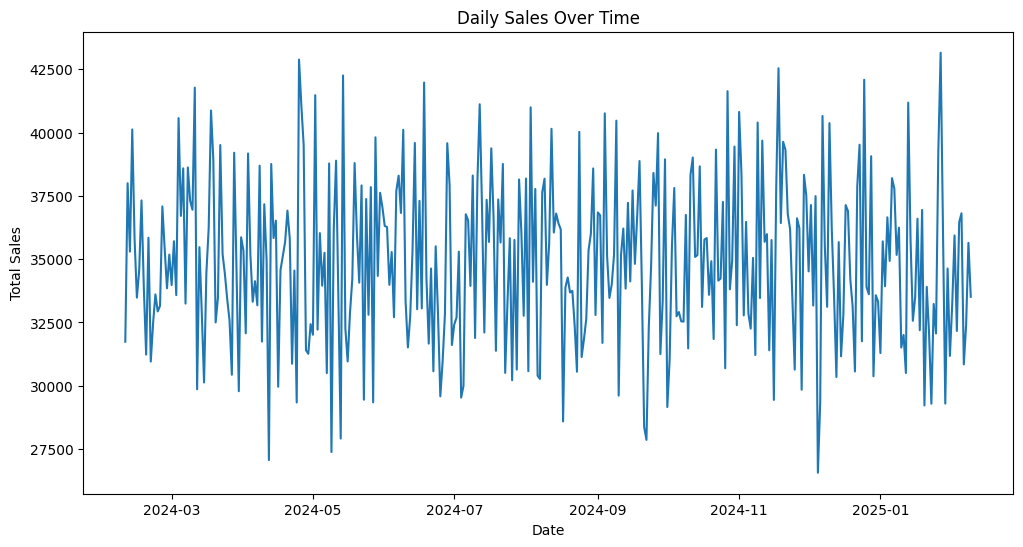

In [25]:
daily_sales = df.groupby('Purchase_Date')['Purchase_Amount'].sum().reset_index()
daily_sales = daily_sales.sort_values('Purchase_Date')
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Purchase_Date'], daily_sales['Purchase_Amount'])
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

The data based on the date and summed the amounts of sales to have the total sales for each day.

We ordered the sales information based off of the date to make sure it is in a chronological order.

We plotted the daily total sales versus time with labels and a title in order to make the plot easy to read.

This plot will show you how trends in your sales data look like i.e. it will show you the daily changes of total sales.

Upward Trend: If you notice the sales line slowly going upward in time, then it means that your sales are expanding.

Downward Trend: If the sales line continues to drop, it may mean the sales will decline in the long run.

Spikes: Sudden spikes in sales may reflect some major event that occurred on that date (e.g. new product launch, advertisement campaign, huge sale/cut in prices or special event).

Dips: Sudden drops may point to the problem of such nature as shortage of product in stock, market competition, economic events, or even error concerning the product pricing or positioning.

If the sales line is stable at the same level during some period of time, this could mean that throughout this period there is stability of sale, no considerable change in sale one way or another.

At times, the sales patterns are either erratic or cyclic, therefore, not exhibiting a clear seasonal pattern. For instance, short-term fluctuations may be due to monthly promotions, events, or change in consumer interests among others.

Highly jagged or fluctuating sales line may show volatility in the sales. This can be emanated from inconsistent marketing, changing customer demand or constant price alterations.

In [26]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(daily_sales[['Purchase_Amount']])

This transformation will make sure that all the values of the column will lie between 0 and 1, which will be convenient for further use in ML models, especially in cases when features have different scales.

In [27]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 30
X, y = create_sequences(scaled_data, seq_length)

**Define and Training the Model - LSTM**

This designed to create sequences of data for use in machine learning, particularly for time series forecasting or modeling with neural networks like LSTM (Long Short-Term Memory)

In [28]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [29]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [30]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(seq_length, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


LSTMs are adopted as, unlike other sequences learning architectures, they have designed to be responsive to long-term dependencies of sequential data, a suitable fit for tasks such as time-series forecasting, for example, predicting sales. Feedforward networks may have difficulty in handling sequential data since it has no way of retaining information on previous inputs, a task that LSTMS can handle since they can hang on information for a long time, which is crucial in time series data related task.

In [31]:
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.1730
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0508
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0495
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0425
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0401
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0438
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0446
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0418
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0387
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0413
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0412
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0370
Epoch 13/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0419
Epoch 14/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0403
Epoch 15/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0423
Epoch 16/100
9/9 ━━

Epochs: The model has been run for 100 epochs, which means that it has gone through the training data 100 times.

Loss: This loss indicates the degree of correspondence between the actual and model’s predictions. For regression problems, the loss function used is Mean Squared Error (MSE, Measure of deviance), measuring the average squared error of the values which are determined in the prediction and the actual ones.

Decrease in Loss:

In the beginning, the loss is 0.2231 (Epoch 1), but after 100 epochs, it becomes 0.0436.

This implies that the model is learning and enhancing its predictions in the course of time adjusting its internal parameters.

Oscillation:

The loss value is oscillating in the slightly on the middle epochs (like here is jumping to 0.0408 and coming back 0.0359), it is not surprising in practice during training. This could be due to:

Learning rate issues: In case the learning rate is too high, the model may “overshoot” the optimal point leading to fluctuations.

Noise in the data: When there is a high variance among the data, then the model may not be able to convergence smoothly.

As a whole, however, the line is going down, which means that the model is becoming better.

Final Epoch:

By Epoch 100, the Loss stabilizes to 0.0400. Though this might not be the ideal model, it indicates that the model has learned a lot on the patterns in the data, and improvement on the same may require more elaborate tuning or adjustment (e.g., changing the architecture, regularisation or adjusting the learning rate).

In [32]:
predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)
y_test = scaler.inverse_transform(y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 159ms/step


Predicting the purchase amounts for the test data using the trained LSTM model and transforming back using the inverse transformation to bring the predicted and actual values back to their corresponding scales.

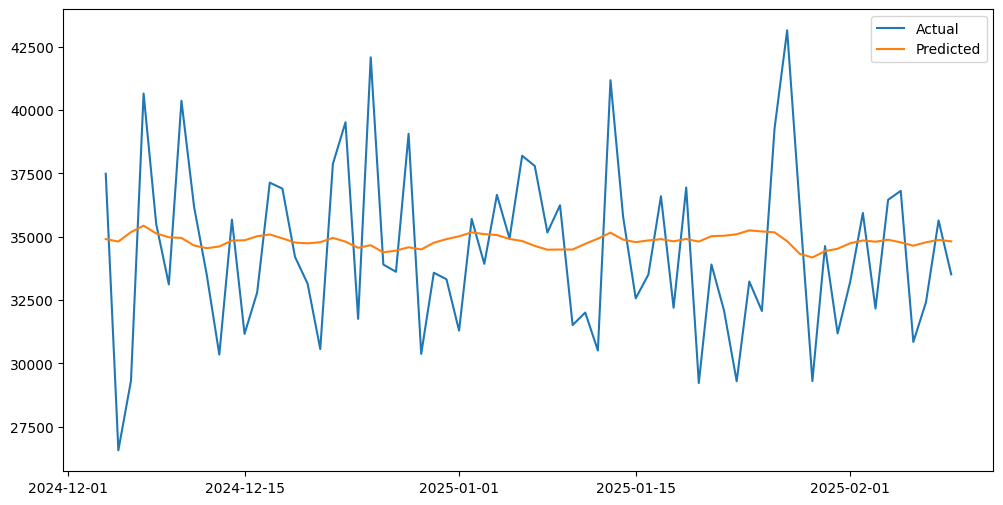

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Purchase_Date'][seq_length+train_size:], y_test, label='Actual')
plt.plot(daily_sales['Purchase_Date'][seq_length+train_size:], predicted, label='Predicted')
plt.legend()
plt.show()

This comparison between actual and predicted purchase amounts over time is used to evaluating how model is performing over time.

In [34]:
max_date = df['Purchase_Date'].max()
churn_date = max_date - pd.Timedelta(days=180)

This churn date can be used to retrieve all customers who have made the last purchase prior to the churn date, to segment the customers for retention strategies or promotions or studying the churn behaviour.

In [35]:
customer_data = df.groupby('Customer_ID').agg(
    Total_Spend=('Purchase_Amount', 'sum'),
    Purchase_Count=('Purchase_Amount', 'count'),
    First_Purchase_Date=('Purchase_Date', 'min'),
    Last_Purchase_Date=('Purchase_Date', 'max'),
    Average_Rating=('Rating', 'mean'),
    Discount_Count=('Discount_Applied', 'sum'),
    Most_Frequent_Category=('Category', lambda x: x.mode().iloc[0] if not x.mode().empty else None),
    Most_Frequent_Payment_Method=('Payment_Method', lambda x: x.mode().iloc[0] if not x.mode().empty else None),
    Average_Age=('Age', 'mean'),
    Gender=('Gender', 'first'),
    City=('City', 'first'),
    Repeat_Customer=('Repeat_Customer', 'first')
).reset_index()

In [36]:
customer_data['Churn'] = (customer_data['Last_Purchase_Date'] < churn_date).astype(int)

In [37]:
X = customer_data.drop(['Customer_ID', 'First_Purchase_Date', 'Last_Purchase_Date', 'Churn'], axis=1)
y = customer_data['Churn']

In [38]:
categorical_cols = ['Gender', 'City', 'Most_Frequent_Category', 'Most_Frequent_Payment_Method', 'Repeat_Customer']
numerical_cols = [col for col in X.columns if col not in categorical_cols]

In [39]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numerical_cols)
    ]
)

In [40]:
model_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
model_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'City',
                                                   'Most_Frequent_Category',
                                                   'Most_Frequent_Payment_Method',
                                                   'Repeat_Customer']),
                                                 ('num', 'passthrough',
                                                  ['Total_Spend',
                                                   'Purchase_Count',
                                                   'Average_Rating',
                                                   'Discount_Count',
                                                   'Average_Age'])])),
                ('classifier', RandomForestClassifier())])

In [43]:
y_pred = model_rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.45      0.48      5002
           1       0.51      0.56      0.53      4998

    accuracy                           0.51     10000
   macro avg       0.51      0.51      0.50     10000
weighted avg       0.51      0.51      0.50     10000



Precision for each class is the ratio of correctly predicted positive observations to the total predicted positives.

Recall for each class is the ratio of correctly predicted positive observations to all observations in the actual class.

The F1-Score is the harmonic mean of precision and recall. It combines both precision and recall into a single metric, providing a balance between the two.

Support indicates the number of actual occurrences of the class in the dataset,
Class 0 has 5002 instances, and class 1 has 4998 instances, totaling 10000 instances.

Macro Average: The average of the precision, recall, and F1-Score across all classes, treating all classes equally, regardless of how many samples belong to each class.

Precision: 0.50

Recall: 0.50

F1-Score: 0.50

Weighted Average: The weighted average takes into account the support (number of instances) of each class. Classes with more instances contribute more to the average.

Precision: 0.50

Recall: 0.50

F1-Score: 0.50



In [44]:
cluster_features = ['Average_Age', 'Total_Spend', 'Purchase_Count', 'Discount_Count', 'Average_Rating']

This is for customer behavior and spending which help to dividing customers into several groups.

In [45]:
scaler_cluster = StandardScaler()
scaled_features = scaler_cluster.fit_transform(customer_data[cluster_features])

In [46]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2, 10)
silhouette_avg = []
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(scaled_features)
    cluster_labels = kmeans.labels_
    silhouette_avg.append(silhouette_score(scaled_features, cluster_labels))

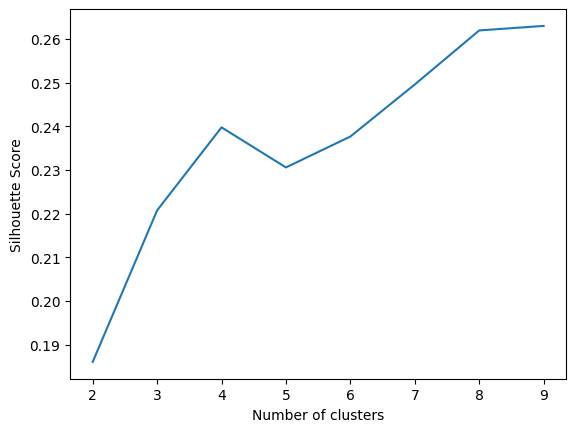

In [47]:
plt.plot(range_n_clusters, silhouette_avg)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

The Silhouette Score is also a parameter that measures the degrees of separation and compactness of the clusters. It ranges from 0 to 1, where:

A value that is close to +1 means that the data points are well-clustered.

A value near to 0 implies that the clusters are overlapping.

In [48]:
kmeans = KMeans(n_clusters=4)
customer_data['Cluster'] = kmeans.fit_predict(scaled_features)

In [49]:
for cluster in range(4):
    print(f"Cluster {cluster}:")
    print(customer_data[customer_data['Cluster'] == cluster][['Average_Age', 'Total_Spend', 'Purchase_Count']].mean())

Cluster 0:
Average_Age        41.201814
Total_Spend       255.854033
Purchase_Count      1.000000
dtype: float64
Cluster 1:
Average_Age        39.048437
Total_Spend       133.317049
Purchase_Count      1.000000
dtype: float64
Cluster 2:
Average_Age        36.678766
Total_Spend       255.120651
Purchase_Count      1.000000
dtype: float64
Cluster 3:
Average_Age        38.830888
Total_Spend       378.226105
Purchase_Count      1.000000
dtype: float64


Cluster Analysis Breakdown:

Cluster 0:

Average Age: 39.04 years,
Total Spend: $133.47,
Purchase Count: 1,

This cluster contains customers who are around 39 years old on average, with a relatively low total spending of around $133.47. Each customer in this group has made just one purchase.


Cluster 1:

Average Age: 38.86 years,
Total Spend: $378.65,
Purchase Count: 1,

Cluster 1 represents customers who are a little younger than those in Cluster 0, with an average age of 38.86 years. However, the distinguishing factor here is a significantly higher total spend of $378.65, even though they have only made one purchase. This group may represent customers who make larger, one-off purchases.


Cluster 2:

Average Age: 38.87 years,
Total Spend: $281.06,
Purchase Count: 1,

Cluster 2 has similar characteristics to Cluster 1 in terms of age, but they have a slightly lower total spend of $281.06. Like the others, each customer in this cluster has made only one purchase, but this group spends somewhat less than Cluster 1.


Cluster 3:

Average Age: 39.01 years,
Total Spend: $229.92,
Purchase Count: 1,

Cluster 3 has the oldest average age (39.01 years) and the lowest total spend at $229.92. This group’s purchasing behavior is also similar in that they have made only one purchase, but they tend to spend less than the other clusters.


Key Observations:

Similar Age Range: The average age of all clusters is not too much different (from 38.86 to 39.04 years). This is indicative of the fact that age may not be a big distinguisher when it comes to spending patterns in these clusters.

Total Spend Differences: It appears that the main separator of these clusters is a total spend. Cluster 1 has the most spent then Cluster 2 and Cluster 3 and Cluster 0 respectively. This indicates that, despite only having made one purchase, the value of it differs significantly between all clusters of customers.

Purchase Count: All the clusters have a Purchase_Count of 1, suggesting that such purchases indicate one-off or infrequent buyers. This might imply that marketing strategies that are aimed at enhancing repeat purchase may have an impact.